In [ ]:
# Did LAPD’s implementation of LASER zones in LA’s 77th Division affect rates of criminalization, displacement, and acquisition by new landlords within that area?

In [96]:
import geopandas as gpd
import contextily as ctx
import pandas as pd

In [97]:
# We will use the neighborhood boundaries from the LA Times
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')

In [98]:
# Trim data to prep for mapping. Only the minimum categories are needed 
neighborhoods = neighborhoods[['name','geometry']]
neighborhoods.head()

,name,geometry
0,Acton,"MULTIPOLYGON (((-118.20262 34.53899, -118.1894..."
1,Adams-Normandie,"MULTIPOLYGON (((-118.30901 34.03741, -118.3004..."
2,Agoura Hills,"MULTIPOLYGON (((-118.76193 34.16820, -118.7263..."
3,Agua Dulce,"MULTIPOLYGON (((-118.25468 34.55830, -118.2555..."
4,Alhambra,"MULTIPOLYGON (((-118.12175 34.10504, -118.1168..."


In [99]:
# Project the neighborhoods to web mercator 
neighborhoods = neighborhoods.to_crs(epsg=3857)

In [100]:
list(neighborhoods.name)

['Acton',
 'Adams-Normandie',
 'Agoura Hills',
 'Agua Dulce',
 'Alhambra',
 'Alondra Park',
 'Altadena',
 'Angeles Crest',
 'Arcadia',
 'Arleta',
 'Arlington Heights',
 'Artesia',
 'Athens',
 'Atwater Village',
 'Avalon',
 'Avocado Heights',
 'Azusa',
 'Baldwin Hills/Crenshaw',
 'Baldwin Park',
 'Bel-Air',
 'Bellflower',
 'Bell Gardens',
 'Bell',
 'Beverly Crest',
 'Beverly Grove',
 'Beverly Hills',
 'Beverlywood',
 'Boyle Heights',
 'Bradbury',
 'Brentwood',
 'Broadway-Manchester',
 'Burbank',
 'Calabasas',
 'Canoga Park',
 'Carson',
 'Carthay',
 'Castaic Canyons',
 'Castaic',
 'Central-Alameda',
 'Century City',
 'Cerritos',
 'Charter Oak',
 'Chatsworth',
 'Chatsworth Reservoir',
 'Chesterfield Square',
 'Cheviot Hills',
 'Chinatown',
 'Citrus',
 'Claremont',
 'Commerce',
 'Compton',
 'Covina',
 'Cudahy',
 'Culver City',
 'Cypress Park',
 'Del Aire',
 'Del Rey',
 'Desert View Highlands',
 'Diamond Bar',
 'Downey',
 'Downtown',
 'Duarte',
 'Eagle Rock',
 'East Compton',
 'East Hollywo

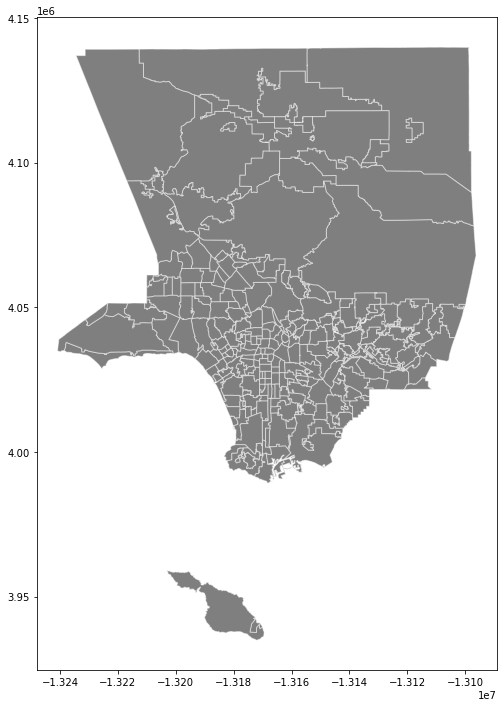

In [101]:
# Next we plot the basemap
ax=neighborhoods.plot(figsize=(12,12),
                      color='black', 
                      edgecolor='white',
                      alpha=0.5)

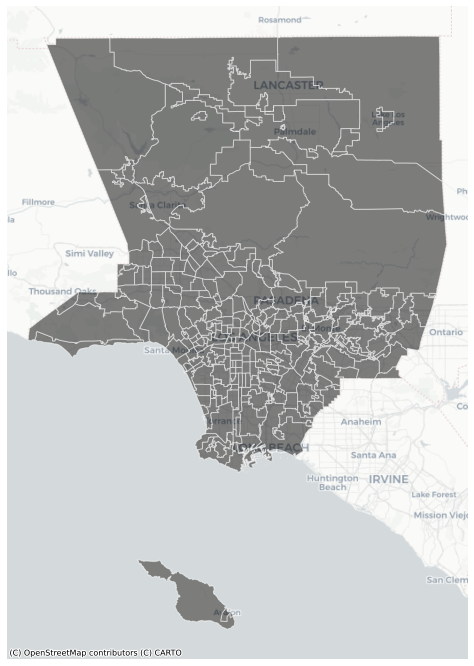

In [103]:
# plotting basemap 
ax=neighborhoods.plot(figsize=(12,12),
                      color='black', 
                      edgecolor='white',
                      alpha=0.5)

# removing the axis from the map
ax.axis('off')

# adding a basemap from contextily
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [104]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata

In [105]:
# will be retrieving LACity data from Sorcrata 
client = Socrata("data.lacity.org", None)

In [106]:
# use the specific crime data key for LACity Crime data feom 2010 - 2019
results = client.get("63jg-8b9z", limit=1000)

In [107]:
# converting to panda dataframe
df = pd.DataFrame.from_records(results)

In [108]:
# retrieve a sample result of 5 to observe data 
df.sample(3)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,location,lat,lon,cross_street,weapon_used_cd,weapon_desc,crm_cd_2
142,100100862,2010-04-30T00:00:00.000,2010-04-30T00:00:00.000,2005,01,Central,0185,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745,9TH,34.0411,-118.2545,MAIN ST,NaN,NaN,998
264,100101190,2010-07-08T00:00:00.000,2010-07-08T00:00:00.000,1040,01,Central,0144,1,220,ATTEMPTED ROBBERY,...,AO,Adult Other,220,MAIN ST,34.0482,-118.2472,4TH ST,113,SIMULATED GUN,998
594,100104525,2010-01-10T00:00:00.000,2010-01-10T00:00:00.000,1805,01,Central,0153,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,AA,Adult Arrest,230,200 W 6TH ST,34.0460,-118.2509,NaN,302,BLUNT INSTRUMENT,NaN


In [109]:
# setting the limit of arrest dates from 2015 - 2017; the dates of the laserzone in observed area 
results = client.get("63jg-8b9z", 
                     limit = 10000, 
                     where = "date_occ between '2015-01-01T00:00:00' and '2017-12-31T00:00:00'"
                    )

In [110]:
# conduct some data exploration
df.shape

(1000, 26)

In [111]:
# look at what kind of information the dataset contains
df.info

<bound method DataFrame.info of          dr_no                date_rptd                 date_occ time_occ  \
0    001307355  2010-02-20T00:00:00.000  2010-02-20T00:00:00.000     1350   
1    011401303  2010-09-13T00:00:00.000  2010-09-12T00:00:00.000     0045   
2    070309629  2010-08-09T00:00:00.000  2010-08-09T00:00:00.000     1515   
3    090631215  2010-01-05T00:00:00.000  2010-01-05T00:00:00.000     0150   
4    100100501  2010-01-03T00:00:00.000  2010-01-02T00:00:00.000     2100   
..         ...                      ...                      ...      ...   
995  100105876  2010-02-05T00:00:00.000  2010-01-28T00:00:00.000     1215   
996  100105878  2010-02-05T00:00:00.000  2010-01-03T00:00:00.000     1400   
997  100105881  2010-02-05T00:00:00.000  2010-02-05T00:00:00.000     1255   
998  100105883  2010-02-05T00:00:00.000  2010-02-03T00:00:00.000     1705   
999  100105888  2010-02-05T00:00:00.000  2010-02-05T00:00:00.000     1345   

    area  area_name rpt_dist_no part_1_2 cr

In [112]:
# list of the dataframe columns
list(df)

['dr_no',
 'date_rptd',
 'date_occ',
 'time_occ',
 'area',
 'area_name',
 'rpt_dist_no',
 'part_1_2',
 'crm_cd',
 'crm_cd_desc',
 'mocodes',
 'vict_age',
 'vict_sex',
 'vict_descent',
 'premis_cd',
 'premis_desc',
 'status',
 'status_desc',
 'crm_cd_1',
 'location',
 'lat',
 'lon',
 'cross_street',
 'weapon_used_cd',
 'weapon_desc',
 'crm_cd_2']

In [113]:
# looking at the data types
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dr_no           1000 non-null   object
 1   date_rptd       1000 non-null   object
 2   date_occ        1000 non-null   object
 3   time_occ        1000 non-null   object
 4   area            1000 non-null   object
 5   area_name       1000 non-null   object
 6   rpt_dist_no     1000 non-null   object
 7   part_1_2        1000 non-null   object
 8   crm_cd          1000 non-null   object
 9   crm_cd_desc     1000 non-null   object
 10  mocodes         908 non-null    object
 11  vict_age        1000 non-null   object
 12  vict_sex        979 non-null    object
 13  vict_descent    979 non-null    object
 14  premis_cd       1000 non-null   object
 15  premis_desc     1000 non-null   object
 16  status          1000 non-null   object
 17  status_desc     1000 non-null   object
 18  crm_cd_1 

In [ ]:
# no empty columns to drop

In [114]:
# convert datafram into geodataframe
crime = gpd.GeoDataFrame(df, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(df.lon, df.lat))

In [115]:
crime = crime.to_crs(epsg=3857)

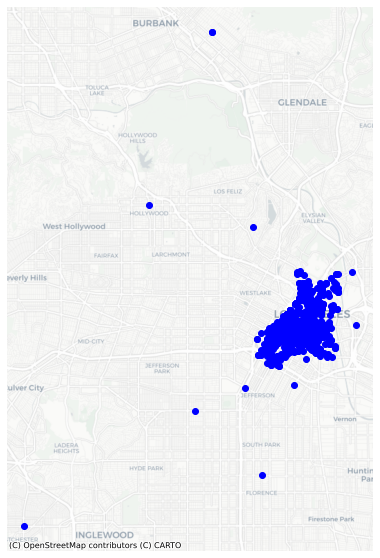

In [116]:
# mapping crime data
ax = crime.plot(figsize=(10,10),color='blue')

# no axis
ax.axis('off')

# adding a basemap to the crime data 
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


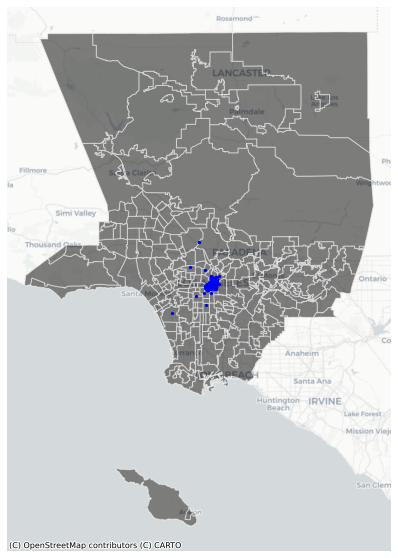

In [117]:
# defining base layer to show the neighborhoods
base = neighborhoods.plot(figsize=(12,10),
                      color='black', 
                      edgecolor='white',
                      alpha=0.5)

# crime will be top layer defined by blue points on base map
ax = crime.plot(ax=base, color='blue', markersize=5)

# no axis
ax.axis('off')

# adding the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [118]:
# get the bounding box coordinates for the crime data
crime.geometry.total_bounds

array([-13179804.69585858,   4023418.84595279, -13160101.14598817,
         4052714.73714307])

In [119]:
# shortcut to put them into their own variables
minx, miny, maxx, maxy = crime.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)


-13179804.695858575
-13160101.145988166
4023418.845952786
4052714.7371430667


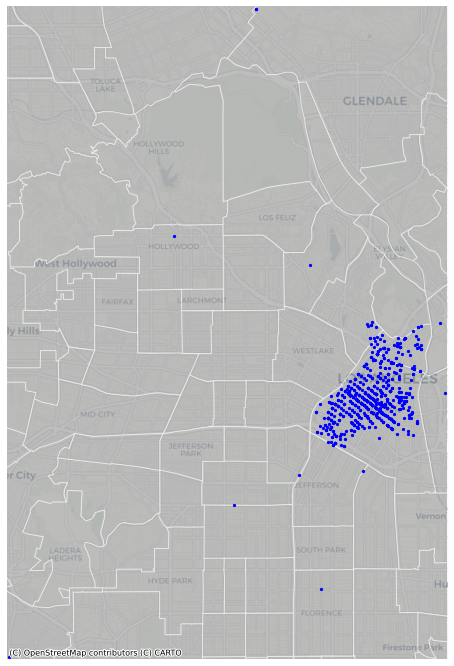

In [154]:
# bounding box coordinates set the x and y limits
base = neighborhoods.plot(figsize=(12,12),
                          color='grey', 
                          edgecolor='white',
                          alpha=0.5)


ax = crime.plot(ax=base, 
                color='blue', 
                markersize=5
               )

# these added numbers increase the boundaries to the minimum and maximums for a better view 
ax.set_xlim(minx - 100, maxx + 100) 
ax.set_ylim(miny - 100, maxy + 100)

# we will remove the axis 
ax.axis('off')

# finally adding the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

ax

In [159]:
def crime_arrests_by_neighborhoods(place='Downtown'):
    
    # subset the neighborhoods geodataframe to zoom in on single neighborhoods 
    neighborhood = neighborhoods[neighborhoods.name==place]

    # bounding box coordinates set the x and y limits
    minx, miny, maxx, maxy = neighborhood.geometry.total_bounds

    # spatial join to get crime in neighborhood
    arrests_in_neighborhoods = gpd.sjoin(crime,neighborhood,how='inner')

    # the base layer will be the neighborhood polygon
    base = neighborhoods.plot(figsize=(12,12),
                             color='blue', 
                             edgecolor='blue',
                             alpha=0.1)

    # Here we add the crime data that will set the points on the basemap
    ax = crime_in_neighborhood.plot(ax=base, 
                                    column='CrimeDescription', 
                                    markersize=40, 
                                    legend=True,
                                    cmap='tab20',
                                    legend_kwds={
                                       'loc': 'upper right',
                                       'bbox_to_anchor':(1.3,1)
                                    }                  # this puts the legend to the side
                                )

    # set the map extent to the extent of the neighborhood bounds
    ax.set_xlim(minx - 200, maxx + 200) # added/substracted value is to give some margin around total bounds
    ax.set_ylim(miny - 200, maxy + 200)

    # turn off the axis
    ax.axis('off')

    # title
    ax.set_title('Crime in LA '+neighborhood.name.values[0]+' Los Angeles',fontsize=20)

    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
    ax

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


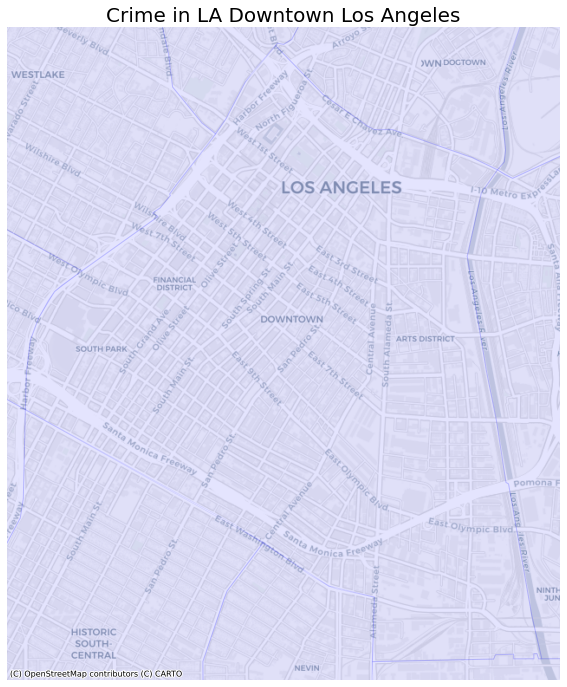

In [162]:
# show basemap. We are having trouble showing the crime data through the function on the basemap 
crime_arrests_by_neighborhoods(place='Downtown')

In [133]:
list(neighborhoods.name)

['Acton',
 'Adams-Normandie',
 'Agoura Hills',
 'Agua Dulce',
 'Alhambra',
 'Alondra Park',
 'Altadena',
 'Angeles Crest',
 'Arcadia',
 'Arleta',
 'Arlington Heights',
 'Artesia',
 'Athens',
 'Atwater Village',
 'Avalon',
 'Avocado Heights',
 'Azusa',
 'Baldwin Hills/Crenshaw',
 'Baldwin Park',
 'Bel-Air',
 'Bellflower',
 'Bell Gardens',
 'Bell',
 'Beverly Crest',
 'Beverly Grove',
 'Beverly Hills',
 'Beverlywood',
 'Boyle Heights',
 'Bradbury',
 'Brentwood',
 'Broadway-Manchester',
 'Burbank',
 'Calabasas',
 'Canoga Park',
 'Carson',
 'Carthay',
 'Castaic Canyons',
 'Castaic',
 'Central-Alameda',
 'Century City',
 'Cerritos',
 'Charter Oak',
 'Chatsworth',
 'Chatsworth Reservoir',
 'Chesterfield Square',
 'Cheviot Hills',
 'Chinatown',
 'Citrus',
 'Claremont',
 'Commerce',
 'Compton',
 'Covina',
 'Cudahy',
 'Culver City',
 'Cypress Park',
 'Del Aire',
 'Del Rey',
 'Desert View Highlands',
 'Diamond Bar',
 'Downey',
 'Downtown',
 'Duarte',
 'Eagle Rock',
 'East Compton',
 'East Hollywo

['0913 1814 2000',
 '0329',
 '0344',
 '1100 0400 1402',
 '0400',
 '0344 1402',
 '0344',
 '0416',
 '0400 0416',
 '0344 1402',
 '0400 0429 2000',
 '0344',
 '0329',
 '0404',
 '0344 0416 1218',
 nan,
 '1251',
 '0344 0416',
 '2000',
 '0346 0400',
 '0416 2000',
 '0344 1609',
 '0344',
 '0400',
 '0416',
 '0416',
 '0416',
 '1402',
 nan,
 '0521',
 '0400 0417',
 '0416',
 '0400 0416',
 '0344 1609',
 '0344',
 '0416',
 '0325 1402',
 '1212',
 '0416',
 '0329',
 '0408',
 '0400',
 '0400 2000',
 '0329',
 '0400',
 '0400',
 '0329',
 '2000',
 '0400 0408',
 '0344 1251',
 '0416 0429',
 nan,
 '0416',
 '0400 2000',
 '0329',
 '0344 0355 0400',
 '0200 0400',
 '1501',
 '0329',
 '0413 0500 0536 0526',
 '0329',
 '0329',
 '0416 1402',
 '0416 0417',
 '0416 0411 0417 1402',
 '0344 1402',
 '0400 2000',
 '0337 0400 0411 0432 0906',
 '0432',
 '0334',
 '0416',
 '2000',
 '0329',
 '0416',
 '0329 1217',
 '0400',
 '0400',
 '0416 0429 0917 1804',
 '0305 0344 0416',
 nan,
 '0344 0906 1402 1609',
 '1402',
 '0416 0419 1202',
 '034

In [ ]:
# Cynthia worked on creating the function and Gerrlyn cleaned the github repostitory and continued to geocode and sort through census data. 